## Linear Regression with Scikit-Learn: From Basics to Healthcare Prediction Cost Project

In [81]:
# Import Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Sample Data – Hours Studied vs Exam Score
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [35, 40, 50, 55, 65, 68, 75, 78, 85, 95]
}
records = pd.DataFrame(data)

In [83]:
print(records)

   Hours_Studied  Exam_Score
0              1          35
1              2          40
2              3          50
3              4          55
4              5          65
5              6          68
6              7          75
7              8          78
8              9          85
9             10          95


In [84]:
print(records.describe())

       Hours_Studied  Exam_Score
count       10.00000    10.00000
mean         5.50000    64.60000
std          3.02765    19.51182
min          1.00000    35.00000
25%          3.25000    51.25000
50%          5.50000    66.50000
75%          7.75000    77.25000
max         10.00000    95.00000


In [85]:
# Split Features and Target
X = records[['Hours_Studied']]  # Feature
y = records['Exam_Score']       # Target

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Build and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [87]:
# Evaluate the Model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 6.8973320451843225
R² Score: 0.9863756404045741


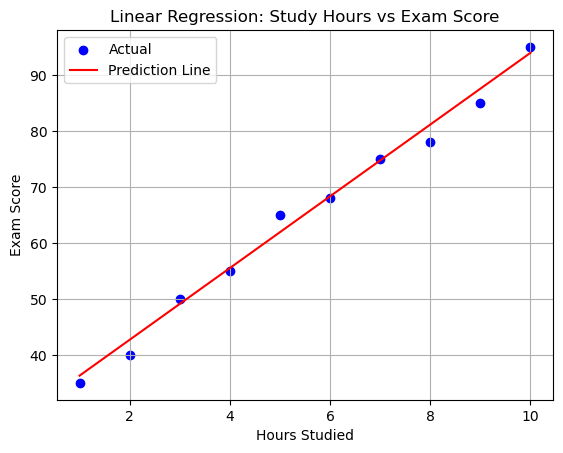

In [88]:
# Visualize
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', label='Prediction Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Study Hours vs Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Summary insight:

# As study hours increase, the predicted exam score increases too.
# The red line shows the model's predictions.
# Mean Squared Error – lower is better. Predictions are close to actual scores.
# R² Score – closer to 1 is better. The model explains ~99% of the variation in exam scores based on study hours.

In [90]:
# Project (Healthcare Prediction Cost)
#import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv("insurance.csv")

In [91]:
# Show the shape of the dataset
print("Dataset shape:", df.shape)

df.head() # View the first 5 rows

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
# Check data types
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [93]:
# Count of unique values for categorical columns
print(df['sex'].value_counts(),"\n")
print(df['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64 

smoker
no     1064
yes     274
Name: count, dtype: int64


In [105]:
# Further Exploratory Analysis
# Assignment: Create a distribution plot for the columns

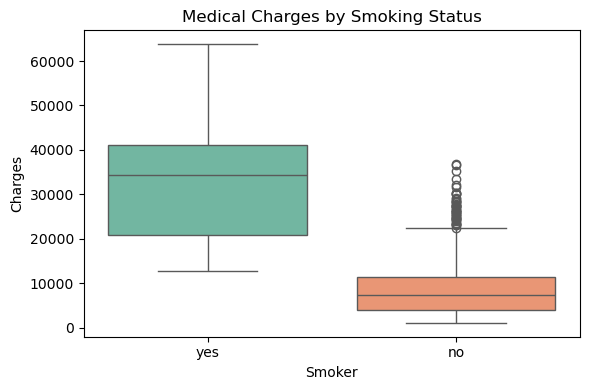

In [94]:
# Charges vs. Smoking Status

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker', palette='Set2', legend=False)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

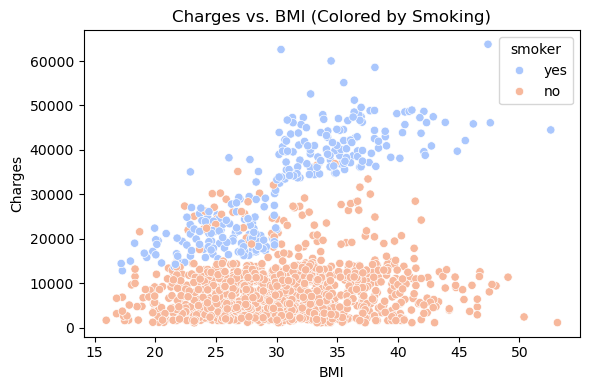

In [95]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='coolwarm')
plt.title('Charges vs. BMI (Colored by Smoking)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

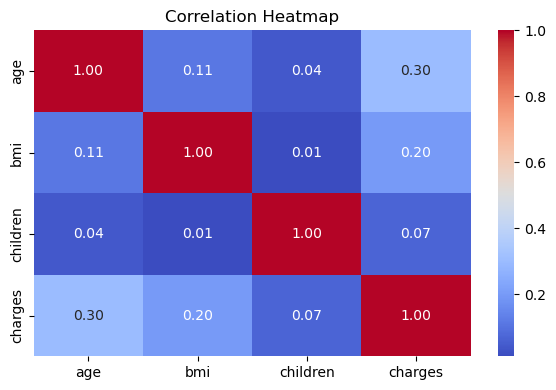

In [97]:
# Correlation matrix

corr = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [98]:
# Split features and target
X = df.drop("charges", axis=1)
y = df["charges"]

In [99]:
# Categorical columns to encode
categorical_cols = ['sex', 'smoker', 'region']

# Create column transformer to one-hot encode categoricals
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

In [100]:
# Transform features
X_encoded = preprocessor.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [104]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train); # Add a semicolon to suppress automatic output in Jupyter.

In [102]:
# Predict on test data
y_pred = lr_model.predict(X_test)
predicted_df = pd.DataFrame({'Predicted Medical Cost ($)': y_pred.round(2)})
print("Predicted Medical Costs:") # Display the first 10 predictions
print(predicted_df.head(10))

Predicted Medical Costs:
   Predicted Medical Cost ($)
0                     8969.55
1                     7068.75
2                    36858.41
3                     9454.68
4                    26973.17
5                    10864.11
6                      170.28
7                    16903.45
8                     1092.43
9                    11218.34


In [76]:
# Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))  # Print the first 10 comparisons

        Actual     Predicted
0   9095.06825   8969.550274
1   5272.17580   7068.747443
2  29330.98315  36858.410912
3   9301.89355   9454.678501
4  33750.29180  26973.173457
5   4536.25900  10864.113164
6   2117.33885    170.280841
7  14210.53595  16903.450287
8   3732.62510   1092.430936
9  10264.44210  11218.343184


In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 33596915.851361476
R² Score: 0.7835929767120722


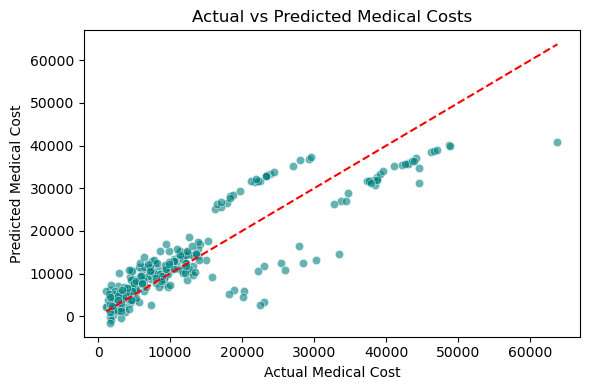

In [80]:
# Visualize Actual Vs. Predicted

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect prediction line
plt.xlabel("Actual Medical Cost")
plt.ylabel("Predicted Medical Cost")
plt.title("Actual vs Predicted Medical Costs")
plt.tight_layout()
plt.show()

In [ ]:
# Summary Insight: 
# As age, BMI, and smoking change, the predicted medical costs also change.
# The scatter plot shows predicted vs. actual costs. Most predictions are close, but not so perfect.
# The Mean Squared Error is high, meaning there are some gaps between predictions and actual costs.
# R² Score ≈ 0.78 — Model explains about 78% of the changes in medical costs. It’s good, but it can still be improved.
# Trying better models or adding more information could help make predictions more accurate.